In [1]:
import pandas as pd
import json
from typing import List
import matplotlib.pyplot as plt

In [2]:
DS_FILEPATH = "data_scientist_data.csv"
MLE_FILEPATH = "machine_learning_data.csv"
PYTHON_FILEPATH = "python_data.csv"
FILEPATHS = [DS_FILEPATH, MLE_FILEPATH, PYTHON_FILEPATH]

In [3]:
def read_file(path:str)->List:
    data = []

    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            data.append(json.loads(line))
    return data

In [4]:
data = []

for path in FILEPATHS:
    data += read_file(path)

In [5]:
len(data)

566

In [6]:
df = pd.DataFrame(data)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   search_term       566 non-null    object
 1   company           566 non-null    object
 2   position          566 non-null    object
 3   address           566 non-null    object
 4   employment_type   566 non-null    object
 5   seniority         566 non-null    object
 6   min_experience    566 non-null    object
 7   job_category      566 non-null    object
 8   salary            566 non-null    object
 9   num_applications  566 non-null    object
 10  last_posted_date  566 non-null    object
 11  expiry_date       566 non-null    object
 12  JD                566 non-null    object
 13  url               566 non-null    object
dtypes: object(14)
memory usage: 62.0+ KB


In [8]:
df.iloc[:,0].value_counts()

machine learning    402
data scientist      109
python               55
Name: search_term, dtype: int64

I will drop some duplicates based on the JD and position. I think it is possible for JD to be the same for different rank, say a more senior position versus a junior one.

In [9]:
# We have 98 Duplicates based on this criteria
df.drop_duplicates(subset=['JD', 'position'], inplace= True)

In [10]:
col = df.columns
col

Index(['search_term', 'company', 'position', 'address', 'employment_type',
       'seniority', 'min_experience', 'job_category', 'salary',
       'num_applications', 'last_posted_date', 'expiry_date', 'JD', 'url'],
      dtype='object')

In [11]:
df.iloc[:,0].value_counts()

machine learning    318
data scientist      105
python               45
Name: search_term, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'TIKTOK PTE. LTD.'),
  Text(1, 0, 'A*STAR RESEARCH ENTITIES'),
  Text(2, 0, 'NATIONAL UNIVERSITY OF SINGAPORE'),
  Text(3, 0, 'NANYANG TECHNOLOGICAL UNIVERSITY'),
  Text(4, 0, 'DBS BANK LTD.'),
  Text(5, 0, 'SINGAPORE UNIVERSITY OF TECHNOLOGY AND DESIGN'),
  Text(6, 0, 'THE SUPREME HR ADVISORY PTE. LTD.'),
  Text(7, 0, 'UNITED OVERSEAS BANK LIMITED'),
  Text(8, 0, 'PIPO (SG) PTE. LTD.'),
  Text(9, 0, 'ENSIGN INFOSECURITY (CYBERSECURITY) PTE. LTD.')])

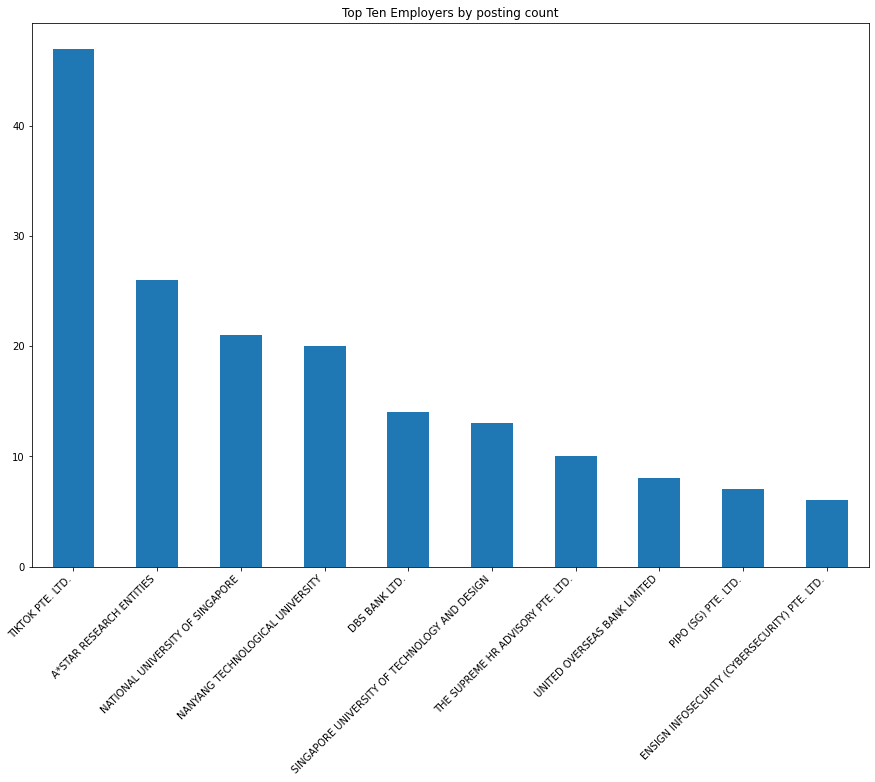

In [12]:
df.iloc[:,1].value_counts()[:10].plot(kind='bar', title='Top Ten Employers by posting count', figsize= (15,10))
plt.xticks(rotation=45, ha='right')